In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sbn

In [2]:
dataFrame = pd.read_excel("merc.xlsx")

In [3]:
dataFrame.head(10)

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
6,2018,30948,Automatic,16000,145,47.9,2.1
7,2012,10948,Automatic,107000,265,36.7,3.5
8,2019,139948,Automatic,12000,145,21.4,4.0
9,2017,19750,Automatic,15258,30,64.2,2.1


In [4]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [5]:
dataFrame.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

C:\Users\Asus\AppData\Local\Temp\ipykernel_3312\686912093.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame["price"])


<Axes: xlabel='price', ylabel='Density'>

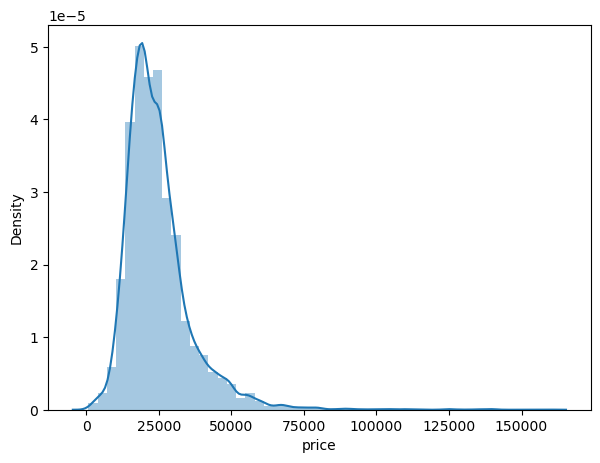

In [6]:
plt.figure(figsize=(7,5))
sbn.distplot(dataFrame["price"])

<Axes: xlabel='year', ylabel='count'>

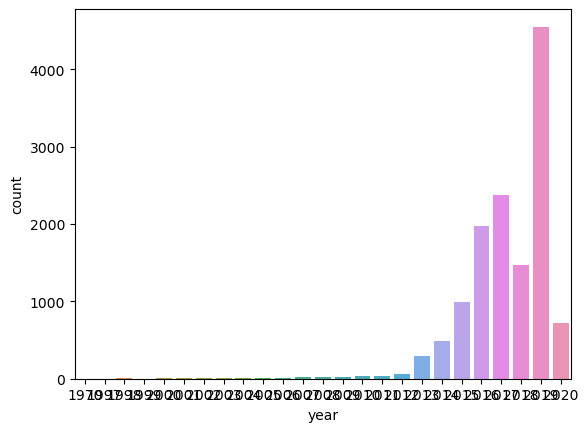

In [7]:
sbn.countplot(x=dataFrame["year"])

In [8]:
dataFrame["year"]

0        2005
1        2017
2        2016
3        2016
4        2016
         ... 
13114    2020
13115    2020
13116    2019
13117    2019
13118    2019
Name: year, Length: 13119, dtype: int64

In [9]:
dataFrame.corr()

C:\Users\Asus\AppData\Local\Temp\ipykernel_3312\3497904997.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.corr()


,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [10]:
dataFrame.corr()["price"].sort_values()

C:\Users\Asus\AppData\Local\Temp\ipykernel_3312\625300545.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.corr()["price"].sort_values()


mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<Axes: xlabel='mileage', ylabel='price'>

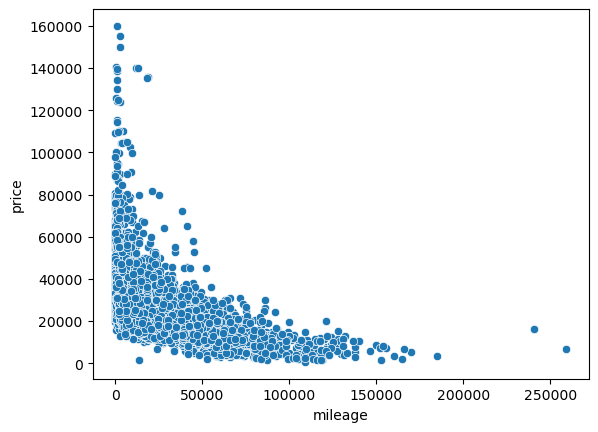

In [11]:
sbn.scatterplot(x="mileage", y="price", data=dataFrame)

In [12]:
dataFrame.sort_values("price",ascending=False).head(20) 

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [13]:
dataFrame.sort_values("price",ascending=True).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


In [14]:
len(dataFrame)

13119

In [15]:
len(dataFrame) * 0.01

131.19

In [16]:
yeniDF = dataFrame.sort_values("price",ascending=False).iloc[131:]

In [17]:
yeniDF

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [18]:
yeniDF.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


C:\Users\Asus\AppData\Local\Temp\ipykernel_3312\3547958106.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(yeniDF["price"])


<Axes: xlabel='price', ylabel='Density'>

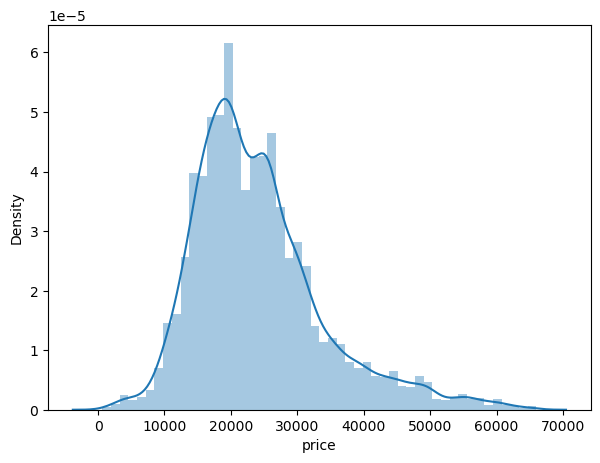

In [19]:
plt.figure(figsize=(7,5))
sbn.distplot(yeniDF["price"])

In [20]:
yeniDF.groupby("year").mean()["price"]

C:\Users\Asus\AppData\Local\Temp\ipykernel_3312\597008176.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yeniDF.groupby("year").mean()["price"]


year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [21]:
yeniDF = yeniDF[yeniDF.year != 1970]

In [22]:
yeniDF[yeniDF.year != 1970].groupby("year").mean()["price"]

C:\Users\Asus\AppData\Local\Temp\ipykernel_3312\631484027.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yeniDF[yeniDF.year != 1970].groupby("year").mean()["price"]


year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [23]:
yeniDF.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [24]:
yeniDF = yeniDF.drop("transmission", axis=1)

In [25]:
y = yeniDF["price"].values
x = yeniDF.drop("price", axis=1).values

In [26]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [27]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [30]:
len(x_train)

9090

In [31]:
len(x_test)

3897

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
x_train.shape

(9090, 5)

In [37]:
model = Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [38]:
model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test), batch_size=250, epochs=300)

Epoch 1/300
37/37 [==============================] - 2s 12ms/step - loss: 672136960.0000 - val_loss: 688086272.0000
Epoch 2/300
37/37 [==============================] - 0s 4ms/step - loss: 672092096.0000 - val_loss: 688009792.0000
Epoch 3/300
37/37 [==============================] - 0s 5ms/step - loss: 671948352.0000 - val_loss: 687747456.0000
Epoch 4/300
37/37 [==============================] - 0s 4ms/step - loss: 671460032.0000 - val_loss: 686884864.0000
Epoch 5/300
37/37 [==============================] - 0s 4ms/step - loss: 669929664.0000 - val_loss: 684283776.0000
Epoch 6/300
37/37 [==============================] - 0s 5ms/step - loss: 665641984.0000 - val_loss: 677470528.0000
Epoch 7/300
37/37 [==============================] - 0s 4ms/step - loss: 655455488.0000 - val_loss: 662473152.0000
Epoch 8/300
37/37 [==============================] - 0s 4ms/step - loss: 634703296.0000 - val_loss: 633782272.0000
Epoch 9/300
37/37 [==============================] - 0s 4ms/step - loss: 597431

37/37 [==============================] - 0s 5ms/step - loss: 21943066.0000 - val_loss: 23082540.0000
Epoch 144/300
37/37 [==============================] - 0s 5ms/step - loss: 21825592.0000 - val_loss: 22954504.0000
Epoch 145/300
37/37 [==============================] - 0s 5ms/step - loss: 21699350.0000 - val_loss: 22854866.0000
Epoch 146/300
37/37 [==============================] - 0s 5ms/step - loss: 21605088.0000 - val_loss: 22758450.0000
Epoch 147/300
37/37 [==============================] - 0s 5ms/step - loss: 21499732.0000 - val_loss: 22712836.0000
Epoch 148/300
37/37 [==============================] - 0s 5ms/step - loss: 21390918.0000 - val_loss: 22654662.0000
Epoch 149/300
37/37 [==============================] - 0s 5ms/step - loss: 21313988.0000 - val_loss: 22556562.0000
Epoch 150/300
37/37 [==============================] - 0s 5ms/step - loss: 21222050.0000 - val_loss: 22467066.0000
Epoch 151/300
37/37 [==============================] - 0s 5ms/step - loss: 21144986.0000 - val

37/37 [==============================] - 0s 5ms/step - loss: 18639652.0000 - val_loss: 20211576.0000
Epoch 286/300
37/37 [==============================] - 0s 4ms/step - loss: 18620238.0000 - val_loss: 20119250.0000
Epoch 287/300
37/37 [==============================] - 0s 4ms/step - loss: 18601060.0000 - val_loss: 20117150.0000
Epoch 288/300
37/37 [==============================] - 0s 4ms/step - loss: 18624212.0000 - val_loss: 20112836.0000
Epoch 289/300
37/37 [==============================] - 0s 4ms/step - loss: 18638102.0000 - val_loss: 20099882.0000
Epoch 290/300
37/37 [==============================] - 0s 4ms/step - loss: 18585446.0000 - val_loss: 20106392.0000
Epoch 291/300
37/37 [==============================] - 0s 4ms/step - loss: 18640424.0000 - val_loss: 20076702.0000
Epoch 292/300
37/37 [==============================] - 0s 4ms/step - loss: 18569726.0000 - val_loss: 20059230.0000
Epoch 293/300
37/37 [==============================] - 0s 5ms/step - loss: 18561716.0000 - val

In [39]:
kayipVerisi = pd.DataFrame(model.history.history)

In [41]:
kayipVerisi.head()

,loss,val_loss
0,672136960.0,688086272.0
1,672092096.0,688009792.0
2,671948352.0,687747456.0
3,671460032.0,686884864.0
4,669929664.0,684283776.0


<Axes: >

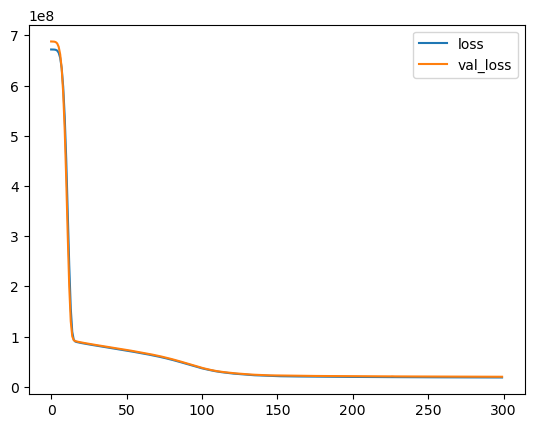

In [42]:
kayipVerisi.plot()

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [45]:
tahminDizisi = model.predict(x_test)

122/122 [==============================] - 0s 2ms/step


In [47]:
tahminDizisi

array([[22374.23 ],
       [23385.68 ],
       [24925.918],
       ...,
       [26181.328],
       [13028.787],
       [24578.771]], dtype=float32)

In [48]:
mean_absolute_error(y_test, tahminDizisi)

3173.8526637013947

In [49]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


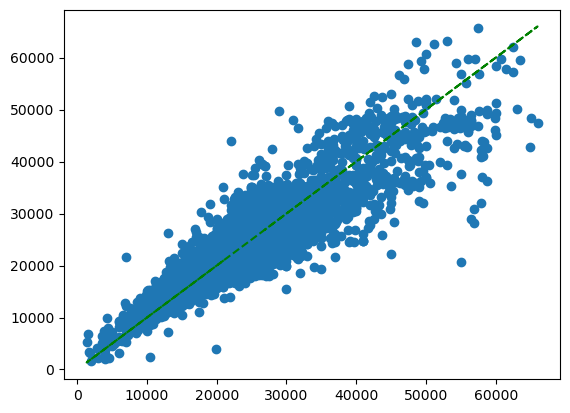

In [51]:
plt.scatter(y_test, tahminDizisi)
plt.plot(y_test, y_test, "g--")

In [81]:
yeniDF.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [87]:
yeniArabaSeries = yeniDF.drop("price", axis=1).iloc[2]

In [88]:
yeniArabaSeries

year          2020.0
mileage       3999.0
tax            145.0
mpg             28.0
engineSize       4.0
Name: 3191, dtype: float64

In [89]:
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,5))

In [90]:
yeniArabaSeries

array([[1.        , 0.01543635, 0.25      , 0.12442183, 0.64516129]])

In [91]:
model.predict(yeniArabaSeries)

1/1 [==============================] - 0s 27ms/step


array([[60832.742]], dtype=float32)